In [153]:
# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 

import seaborn as sns 
sns.set_style('darkgrid')

%matplotlib inline

%pip install scikit-learn  --upgrade --force
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Reading
#df= pd.read_csv("MasterFile_6-1-23.csv", index_col=0)
#df= pd.read_csv("MasterFile_6-1-23.csv")
dfML = pd.read_csv("MasterFile_6-18-23.csv" )
dfML_S = pd.read_csv("MasterFile_6-18-23.csv" )




# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 
import seaborn as sns 
sns.set_style('darkgrid')
from matplotlib import style
%matplotlib inline


from statistics import mean

%pip install scikit-learn  --upgrade --force
%pip install xgboost
%pip install lightgbm
%pip install yellowbrick




# ML 
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge



from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (TimeSeriesSplit, KFold, StratifiedKFold, GroupKFold, StratifiedGroupKFold)

import lightgbm as lgb

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached numpy-1.25.0-cp311-cp311-win_amd64.whl (15.0 MB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.0
    Uninstalling numpy-1.25.0:
      Successfully uninstalled numpy-1.25.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: scikit-learn
    Found existing

Testing  Scaler with dfML

In [154]:
dfML.columns

Index(['DB', 'OB', 'HD', 'HC', 'HBP', 'SMK', 'COPD', 'ASM', 'Stroke'], dtype='object')

In [155]:
X= dfML.iloc[:,:-1]
y = dfML.iloc[:, -1]  # dependent feature (Stroke).
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train, X_test, y_train, y_test, = train_test_split(X,y, test_size=0.2, random_state=0)

In [156]:
X.columns

Index(['DB', 'OB', 'HD', 'HC', 'HBP', 'SMK', 'COPD', 'ASM'], dtype='object')

In [157]:
y

0        3.5
1        2.7
2        2.2
3        3.0
4        2.4
        ... 
27999    2.8
28000    3.2
28001    3.0
28002    2.3
28003    2.3
Name: Stroke, Length: 28004, dtype: float64

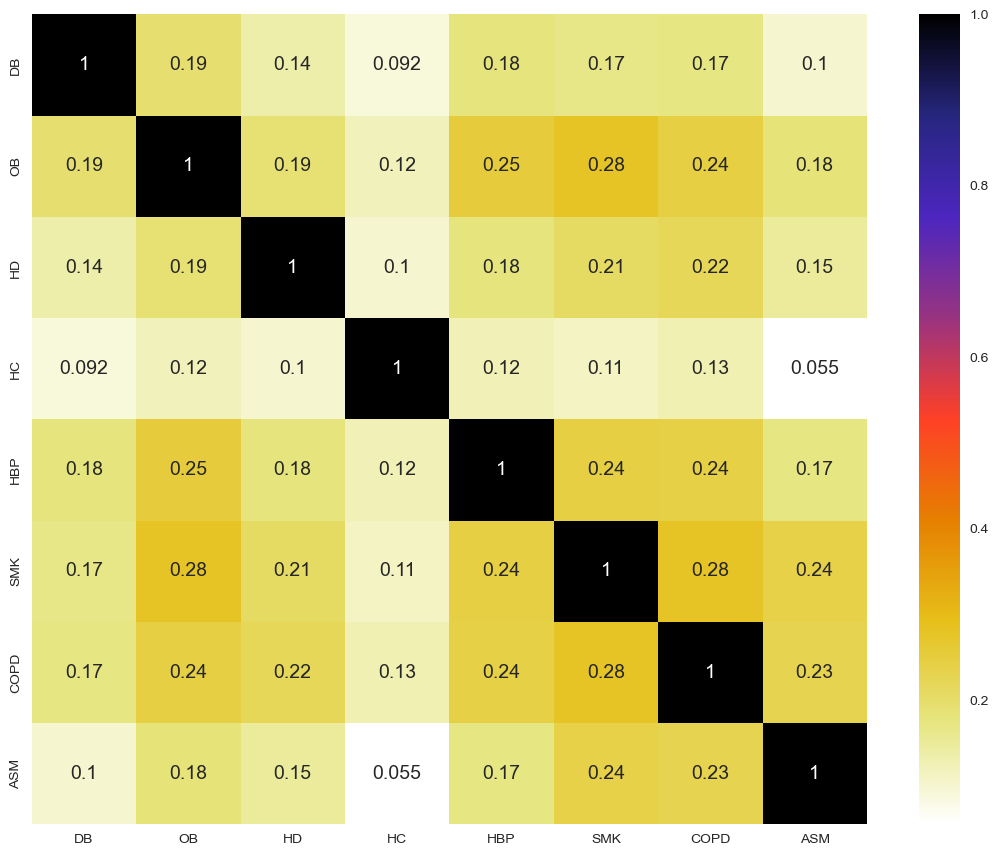

In [158]:
# X_train - viz if any variables have highest corr. .90 or higher that may consider dup. features.
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [159]:
#Check corr. every variables on the training set for corr. 
def correlation(dfML, threshold):
    col_corr = set() # set of all the names of corrected columns.
    corr_matrix = dfML.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


# calling the def and passing the aug.
corr_features = correlation(X_train, 0.90) # the the threshold for the variable
len(set(corr_features))

        
corr_features

set()

Scaling the dataframe 

In [160]:
# applying MinMaxScaler to dfML.
for col in dfML:
    mx = MinMaxScaler()
    dfML[col] = mx.fit_transform(dfML[[col]])
    


# applying StardardScaler to dfMS_S dataframe.
for col in dfML_S:
    ss = StandardScaler()
    dfML_S[col] = ss.fit_transform(dfML_S[[col]])

FOR LOOP FOR ALL MODELS - Highper and CV Not applying 

In [161]:
models = {"Linear Regression": LinearRegression(),
        "Decision Tree ": DecisionTreeRegressor(),
        "XGB Regressor ": XGBRegressor(),
        "Random Forest ": RandomForestRegressor(n_estimators=20, random_state=1)
        }

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) #Train each model
    
    #Make predction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
        
    #Score and error
    r_Sq = model.score(X,y)
    r2_Score = (r2_score(y_test,y_test_pred)) # reduction by using using least square to fit the line.
    MSE_err = (mean_squared_error(y_test,y_test_pred))
    MAE_err = (mean_absolute_error(y_test_pred,y_test))
    MAPE_err = (mean_absolute_percentage_error(y_test_pred,y_test)) 
    
    
    # Print 
    print(list(models.keys())[i])
    
    
    #print('Coef. of determ. Score', r_Sq)
    print('r2 Score = ', r2_Score)
    print('MSE err = ', MSE_err)
    print('MAE err = ', MAE_err)
    print('MAPE err = ', MAPE_err)
        
    print('\n')
    
print()


Linear Regression
r2 Score =  0.08725256624293765
MSE err =  1.8722023053567614
MAE err =  0.9884390107071603
MAPE err =  0.30494135518285115


Decision Tree 
r2 Score =  -0.9380571668681139
MSE err =  3.9752892876272097
MAE err =  1.4642510266023925
MAPE err =  0.5247067310640766


XGB Regressor 
r2 Score =  0.024079129987631842
MSE err =  2.0017819115219115
MAE err =  1.0205160701958076
MAPE err =  0.31543512863903117


Random Forest 
r2 Score =  0.00919799854776715
MSE err =  2.032305676977326
MAE err =  1.048294679521514
MAPE err =  0.31941610635332385





Linear Regression using MinMaxScaler

In [162]:

# Fit/load into a model
modelReg = LinearRegression ()
modelReg.fit(X_train,y_train)


LinearRegression()

In [163]:
#=========================================
score_train = modelReg.predict(X_train)
score_test = modelReg.predict(X_test)
#-========================================

y_pred = modelReg.predict(X_test) # predict X(all factors).
modelReg.score(X_test,y_test) # See the performance (diff of actual value(y_test) from predicted X_test)

0.08725256624293765

Linear Ridge with GridSearchCV parmeters

In [164]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_ModelReg=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error', cv=5)
ridge_ModelReg.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [165]:
print(ridge_ModelReg.best_params_)
print(ridge_ModelReg.best_score_)

{'alpha': 1e-15}
-1.8790439783297725


In [166]:
# libraires to split the data into training and test set.
#from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test, = train_test_split(X,y, test_size=0.2, random_state=0)

In [167]:
y_pred_ridge=ridge_ModelReg.predict(X_test)
print('Score', r2_score(y_test,y_pred_ridge)) # r2 = SSR / SST

Score 0.08816130721197657


NEXT on StandardScaler Model

Linear Regressing using StandardScaler()

In [193]:
Xs= dfML_S.iloc[:,:-1]
ys = dfML_S.iloc[:, -1]  # dependent feature (Stroke).
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs,ys,test_size=0.2)

In [195]:

# Fit/load into a model
modelReg = LinearRegression ()
modelReg.fit(Xs_train,ys_train)

LinearRegression()

In [197]:
#=========================================
score_train = modelReg.predict(Xs_train)
score_test = modelReg.predict(Xs_test)
#-========================================

y_pred = modelReg.predict(Xs_test) # predict X(all factors).
print('StandardScaler Model Score ' , modelReg.score(Xs_test,ys_test)) # See the performance (diff of actual value(y_test) from predicted X_test)

StandardScaler Model Score  0.08049125748741748


StandardScaler Model - Ridge with GridesearchCV 

In [198]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [199]:
ridge_s=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_ModelReg_s=GridSearchCV(ridge_s,parameters,scoring='neg_mean_squared_error', cv=5)
ridge_ModelReg_s.fit(Xs,ys)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [200]:
print(ridge_ModelReg_s.best_params_)
print(ridge_ModelReg_s.best_score_)

{'alpha': 1e-15}
-0.92041486560687


In [201]:


# libraires to split the data into training and test set.
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test, = train_test_split(X,y, test_size=0.2, random_state=0)

In [203]:
y_pred_ridge=ridge_ModelReg_s.predict(Xs_test)
print('Score', r2_score(ys_test,y_pred_ridge)) # r2 = SSR / SST

Score 0.08104095645658127


In [204]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

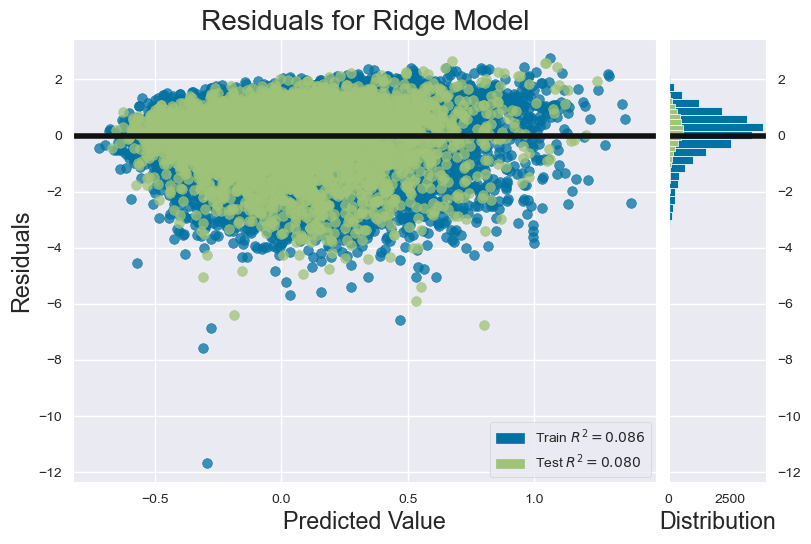

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [206]:
# Residual on StandardScaler Ridge Model.
ridge_s= Ridge()
visualizer = ResidualsPlot(ridge_s)
visualizer.fit(Xs_train, ys_train)  # Fit the training data to the visualizer
visualizer.score(Xs_test, ys_test)  # Evaluate the model on the test data
visualizer.show() 

plot
Residual plots can be used to assess the quality of a regression. Currently, six types of residual plots are supported by the linear fitting dialog box:

Residual vs. Independent
Residual vs. Predicted Value
Residual vs. Order of the Data
Histogram of the Residual
Residual Lag Plot
Normal Probability Plot of Residuals

Text(0.5, 1.0, 'Actual vs Predicted Values')

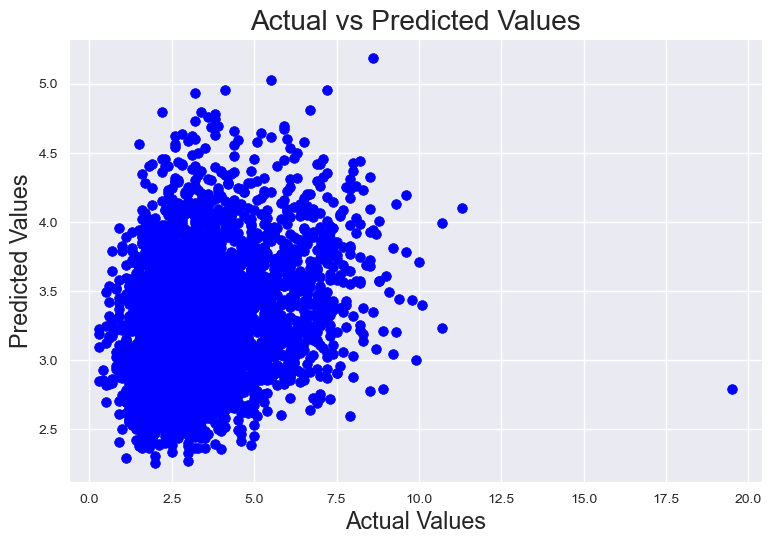

In [178]:
plt.scatter(y_test, y_pred_ridge, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

In [179]:
dfML['DB'].describe()

count    28004.000000
mean         0.258683
std          0.108746
min          0.000000
25%          0.183463
50%          0.242894
75%          0.310078
max          1.000000
Name: DB, dtype: float64

In [180]:
dfML.columns

Index(['DB', 'OB', 'HD', 'HC', 'HBP', 'SMK', 'COPD', 'ASM', 'Stroke'], dtype='object')

In [181]:
dfML.isnull().sum()

DB        0
OB        0
HD        0
HC        0
HBP       0
SMK       0
COPD      0
ASM       0
Stroke    0
dtype: int64

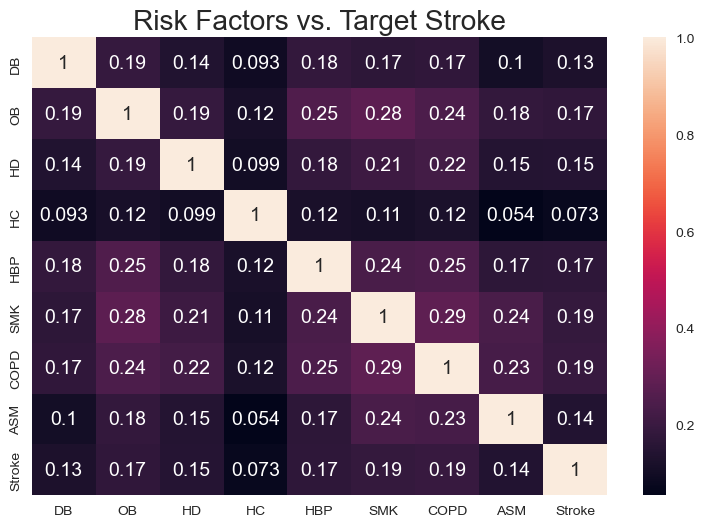

In [182]:
#Heatmap - illustrate from the low to high scales. 
# Looking for the highest (positive) or (negative) corr. features to the target.
# Which data are more predicted than the others. Which features have strong corr. or not to the target.

plt.title('Risk Factors vs. Target Stroke')
plt.tight_layout()
df_corr = dfML[['DB', 'OB', 'HD', 'HC', 'HBP', 'SMK', 'COPD', 'ASM', 'Stroke']].corr()
sns.heatmap(df_corr, annot=True)
plt.show()

In [183]:
# check the corr against the Target_value.
dfML.corr()['Stroke']

DB        0.127349
OB        0.172493
HD        0.147029
HC        0.072739
HBP       0.171338
SMK       0.185348
COPD      0.192802
ASM       0.140711
Stroke    1.000000
Name: Stroke, dtype: float64

### Diabetes vs. Diabetes Distribution.

C:\Users\dolly\AppData\Local\Temp\ipykernel_8588\2660600713.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfML['DB'])


Text(0.5, 0, 'DB- Data too peak in the middle - right skew.')

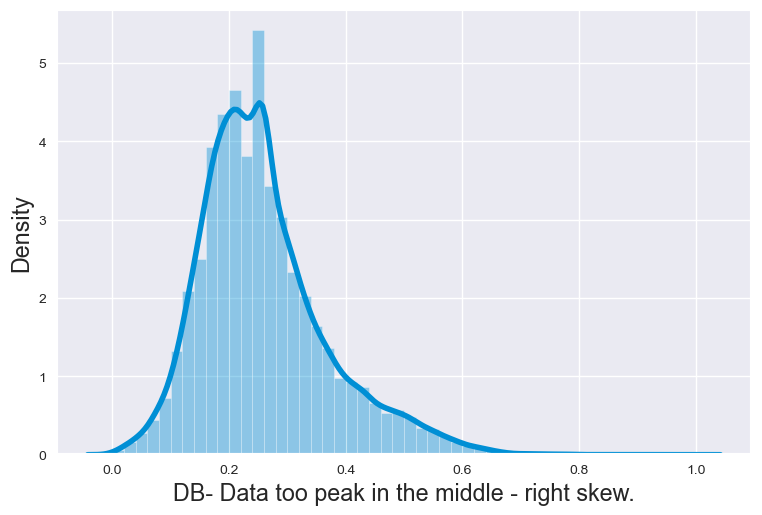

In [184]:
sns.distplot(dfML['DB'])
plt.xlabel('DB- Data too peak in the middle - right skew.')


In [185]:
# Orginal values
print(dfML['DB'].describe())
print('Skewness',  dfML['DB'].skew())

count    28004.000000
mean         0.258683
std          0.108746
min          0.000000
25%          0.183463
50%          0.242894
75%          0.310078
max          1.000000
Name: DB, dtype: float64
Skewness 0.9477142955969878


(array([1.950e+02, 7.290e+02, 2.681e+03, 5.263e+03, 5.881e+03, 5.516e+03,
        2.931e+03, 1.743e+03, 1.201e+03, 7.890e+02, 5.620e+02, 3.160e+02,
        1.320e+02, 3.900e+01, 1.300e+01, 8.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

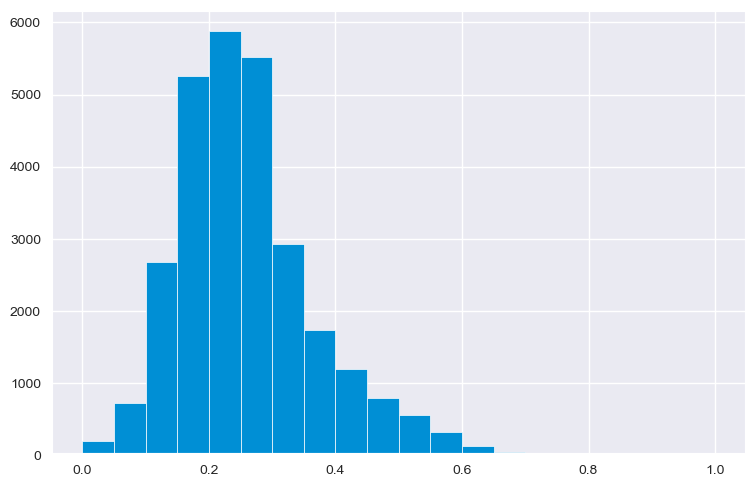

In [186]:
plt.hist(dfML['DB'], bins = 20)

In [187]:
# Orginal values
print(dfML['Stroke'].describe())
print('Skewness',  dfML['Stroke'].skew())

count    28004.000000
mean         0.151637
std          0.074419
min          0.000000
25%          0.104167
50%          0.135417
75%          0.177083
max          1.000000
Name: Stroke, dtype: float64
Skewness 1.4909502471609901


Apply Logging

(array([7.160e+02, 5.892e+03, 9.485e+03, 6.759e+03, 2.277e+03, 1.310e+03,
        8.220e+02, 4.680e+02, 1.910e+02, 5.200e+01, 1.800e+01, 7.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

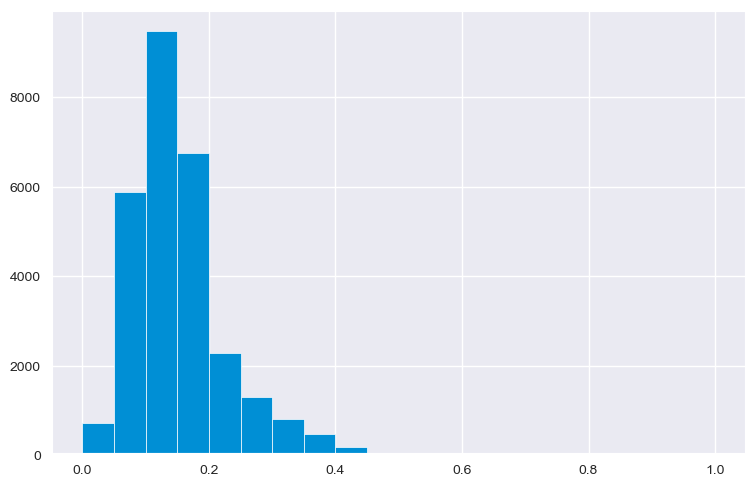

In [188]:
plt.hist(dfML['Stroke'], bins = 20)

In [189]:
dfML['Log_DB'] = np.log((dfML.DB)+.85)

In [190]:
print(dfML.Log_DB.describe())
print(('Skewness',  dfML['Log_DB'].skew()))

count    28004.000000
mean         0.098576
std          0.094924
min         -0.162519
25%          0.032915
50%          0.088829
75%          0.148487
max          0.615186
Name: Log_DB, dtype: float64
('Skewness', 0.6307670346034101)


In [191]:
plt.hist(dfML['Log_DB_Values'], bins = 20)

KeyError: 'Log_DB_Values'

In [ ]:
print(dfML['Log_DB_Values'].describe())
print('Skewness',  dfML['Log_DB_Values'].skew())

In [ ]:
sns.distplot(dfML['OB_Values'])
plt.xlabel('OB- Data with fat tails - right skew.')

In [ ]:
# original values
print(dfML['OB_Values'].describe())
print('Skewness',  dfML['OB_Values'].skew())

In [ ]:
plt.hist(dfML['OB_Values'], bins = 20)

In [ ]:
dfML['Log_OB_Values'] = np.log((dfML.OB_Values))

In [ ]:
plt.hist(dfML['Log_OB_Values'], bins = 20)

In [ ]:
print(dfML['Log_OB_Values'].describe())
print('Skewness',  dfML['Log_OB_Values'].skew())

In [ ]:
plt.hist(dfML['TargetStroke'], bins = 20)

Log applied to Target + 20.0

In [ ]:
# testing - orginal values
dfML['TargetStroke'].describe()

In [ ]:
dfML['Log_Target_Values'] = np.log((dfML.TargetStroke)+20.00)
dfML['Log_Target_Values'].describe()

In [ ]:
plt.hist(dfML['Log_Target_Values'], bins = 20)

In [ ]:
print(dfML['Log_Target_Values'].describe())
print('Skewness',  dfML['Log_Target_Values'].skew())

In [ ]:
dfML.corr()['Log_Target_Values']

In [ ]:
sns.distplot(dfML['DB_Values'])
sns.distplot(dfML['OB_Values'])

plt.xlabel('Diabestes vs. Obesity Population')
plt.ylabel('Median Measure(Density)')

In [ ]:
sns.distplot(dfML['HC_Values'])
plt.xlabel('HC- skinny tails and high peak in the middle.')

In [ ]:
print(dfML['HC_Values'].describe())
print('Skewness',  dfML['HC_Values'].skew())

In [ ]:
plt.hist(dfML['HC_Values'], bins = 20)

In [ ]:
dfML['Log_HC_Values'] = np.log((dfML.HC_Values)+15)

In [ ]:
plt.hist(dfML['Log_HC_Values'], bins = 20)

In [ ]:
print(dfML['Log_HC_Values'].describe())
print('Skewness',  dfML['Log_HC_Values'].skew())

In [ ]:
sns.distplot(dfML['HD_Values'])
plt.xlabel('HD- Data too peak in the middle - right skew.')

In [ ]:
print(dfML['HD_Values'].describe())
print('Skewness',  dfML['HD_Values'].skew())

In [ ]:
dfML['Log_HD_Values'] = np.log((dfML.HD_Values) + 15.0)

In [ ]:
plt.hist(dfML['Log_HD_Values'], bins = 20)

In [ ]:
print(dfML['Log_HD_Values'].describe())
print('Skewness',  dfML['Log_HD_Values'].skew())

In [ ]:
sns.distplot(dfML['HBP_Values'])
plt.xlabel('HBP- Data too peak in the middle - right skew.')

In [ ]:
print(dfML['HBP_Values'].describe())
print('Skewness',  dfML['HBP_Values'].skew())

In [ ]:
plt.hist(dfML['HBP_Values'], bins = 20)

In [ ]:
dfML['Log_HBP_Values'] = np.log((dfML.HBP_Values))

In [ ]:
print(dfML['Log_HBP_Values'].describe())
print('Skewness',  dfML['Log_HBP_Values'].skew())

Replacimg values 

In [ ]:
#dfML['HD_Values'].fillna(dfML['HD_Values'].mean(),inplace=True)

###  Diabetes vs. Diabetes Stat.

In [ ]:
print('Mean value of Diabetes', dfML['Log_DB_Values'].mean())
print('Std value of Diabetes', dfML['Log_DB_Values'].std())
print('Min value of Diabetes', dfML['Log_DB_Values'].min())
print('Max value of Diabetes', dfML['Log_DB_Values'].max())
print('Skewness of Diabetes', dfML['Log_DB_Values'].skew())
print('-vs-')
print('Mean value of Obesity', dfML['Log_OB_Values'].mean())
print('Std value of Obesity', dfML['Log_OB_Values'].std())
print('Min value of Obesity', dfML['Log_OB_Values'].min())
print('Max value of Obesity', dfML['Log_OB_Values'].max())
print('Skewness of Obesity:', dfML['Log_OB_Values'].skew())

In [ ]:
sns.distplot(dfML['Log_DB_Values'])
sns.distplot(dfML['Log_OB_Values'])


plt.xlabel('DB. vs. OB - Log applied ')
plt.ylabel('Median Measure(Density)')

### High Cholestrol vs. Heart Disese vs. High Blood Pressure.

In [ ]:
sns.distplot(dfML['Log_HC_Values'])
sns.distplot(dfML['Log_HD_Values'])
sns.distplot(dfML['Log_HBP_Values'])

plt.xlabel('High Cho. vs. Heart Dis. vs. High Bld Pressure - Log applied')
plt.ylabel('Median Measure(Density)')

# High Cholestrol vs. Heart Disese vs. High Blood Pressure Stat.

In [ ]:
print('Mean value of High cholestrol', dfML['Log_HC_Values'].mean())
print('Std value of  High cholestrol', dfML['Log_HC_Values'].std())
print('Min value of  High cholestrol', dfML['Log_HC_Values'].min())
print('Max value of  High cholestrol', dfML['Log_HC_Values'].max())
print('Skewness of  High cholestrol',  dfML['Log_HC_Values'].skew())

print('-vs-')
print('Mean value of Heart Disease', dfML['Log_HD_Values'].mean())
print('Std value of Heart Disease', dfML['Log_HD_Values'].std())
print('Min value of Heart Disease', dfML['Log_HD_Values'].min())
print('Max value of Heart Diseasee', dfML['Log_HD_Values'].max())
print('Skewness of Heart Disease',  dfML['Log_HD_Values'].skew())

print('-vs-')
print('Mean value of High Blood Pressure', dfML['Log_HBP_Values'].mean())
print('Std value of High Blood Pressure', dfML['Log_HBP_Values'].std())
print('Min value of High Blood Pressure', dfML['Log_HBP_Values'].min())
print('Max value of High Blood Pressure', dfML['Log_HBP_Values'].max())
print('Skewness of High Blood Pressure',  dfML['Log_HBP_Values'].skew())

In [ ]:
dfML.columns

In [ ]:
# dropping for the subplot - boxplots below
dfML_Log = dfML.drop(columns=['Year_Obv', 'States', 'DB_Values', 'DB_Low', 'DB_High', 'OB_Values',
       'OB_Low', 'OB_High', 'HD_Values', 'HD_Low', 'HD_High', 'HC_Values',
       'HC_Low', 'HC_High', 'HBP_Values', 'HBP_Low', 'HBP_High', 'TargetStroke', ])
#dfBP_01 = dfML_01.rename(columns={'DB_Values':'DB', 'DB_Low':'DBLo', 'DB_High':'DBHx', 'OB_Values':'OB', 'OB_Low':'OBLo', 'OB_High':'OBHx',  'HC_Values':'HC', 'HC_Low':'HCLo',  'HC_High':'HCHx',  'HD_Values':'HD',   'HD_Low':'HDLo',  'HD_High':'HDHx', 'HBP_Values':'HBP', 'HBP_Low':'HBPLo','HBP_High':'HBPHx','TargetStroke':'Target' })

In [ ]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 
plt.boxplot(x=dfML_Log['Log_DB_Values'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);
plt.xlabel('Diabetes')
plt.show()

In [ ]:
dfML_Log.columns

Log 1p transform

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

Building an isolation Forest Model to visualize outliers.

In [ ]:

anomaly_inputs = ['Log_DB_Values',  'Log_OB_Values',  
       'Log_HD_Values',   'Log_HC_Values',  
       'Log_HBP_Values', 'Log_Target_Values']

from sklearn.ensemble import IsolationForest
model_IF = IsolationForest(contamination=0.1, random_state=42)
model_IF.fit(dfML_Log[anomaly_inputs])



# visualize outliers

In [ ]:
dfML_Log['anomaly_scores'] = model_IF.decision_function(dfML_Log[anomaly_inputs])
dfML_Log['anomaly'] = model_IF.predict(dfML_Log[anomaly_inputs])

palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(dfML_Log, vars=anomaly_inputs, hue='anomaly', palette=palette)

In [ ]:

plt.title('Risk Factors vs. Target Stroke')
plt.tight_layout()
df_corr = dfML_Log[['Log_DB_Values',  'Log_OB_Values', 'Log_HD_Values',  'Log_HC_Values','Log_HBP_Values', 'Log_Target_Values']].corr()
sns.heatmap(df_corr, annot=True)
plt.show()

In [ ]:
# check the corr against the Target_value.
dfML_Log.corr()['Log_Target_Values']

In [ ]:
dfML_Log.head(5)

In [ ]:
dfML_Log = dfML.drop(columns=['Year_Obv', 'States', 'DB_Values', 'DB_Low', 'DB_High', 'OB_Values',
       'OB_Low', 'OB_High', 'HD_Values', 'HD_Low', 'HD_High', 'HC_Values',
       'HC_Low', 'HC_High', 'HBP_Values', 'HBP_Low', 'HBP_High', 'TargetStroke', ])

### Cal. each upper and lower quantiles.


In [ ]:
#Subplot

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(dfML_Log.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(dfML_Log.iloc[:,i], flierprops=red_circle) # exclude row#0 and #1
    ax.set_title(dfML_Log.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.show()

In [ ]:
dfML_Log.columns

In [ ]:
dfML_Log['Log_OB_Values'].describe

In [ ]:
q01 = dfML_Log['Log_DB_Values'] .quantile(.99)
q02 = dfML_Log['Log_DB_Values'] .quantile(0.01)
#q03 = dfML['DB_Low'] .quantile(0.90)
#q04 =  dfML['DB_Low'] .quantile(0.01)
#q05 = dfML['DB_High'] .quantile(0.90)
#q06 = dfML['DB_High'] .quantile(0.01)

q07 =  dfML_Log['Log_OB_Values'] .quantile(0.95)
q08 =  dfML_Log['Log_OB_Values'] .quantile(0.01)
#q09 =  dfML['OB_Low'] .quantile(0.95)
#q10 =  dfML['OB_Low'] .quantile(0.01)
#q11 =  dfML['OB_High'] .quantile(0.95)
#q12 =  dfML1['OB_High'] .quantile(0.01)


q13 =  dfML_Log['Log_HC_Values'] .quantile(0.95)
q14 =  dfML_Log['Log_HC_Values'] .quantile(0.2)
#q15 =  dfML['HC_Low'] .quantile(0.95)
#q16 =  dfML['HC_Low'] .quantile(0.02)
##q17 =  dfML['HC_High'] .quantile(0.95)
#q18 =  dfML['HC_High'] .quantile(0.02)


q19 =  dfML_Log['Log_HD_Values'] .quantile(0.90)
q20 =  dfML_Log['Log_HD_Values'] .quantile(0.01)
#q21 = dfML['HD_Low'] .quantile(0.90)
#q22 =  dfML['HD_Low'] .quantile(0.01)
#q23 =  dfML['HD_High'] .quantile(0.90)
#q24 =  dfML['HD_High'] .quantile(0.01)

q25 =  dfML_Log['Log_HBP_Values'] .quantile(0.90)
q26 = dfML_Log['Log_HBP_Values'] .quantile(0.02)
#q27 =  dfML['HBP_Low'] .quantile(0.89)
#q28 =  dfML['HBP_Low'] .quantile(0.02)
#q29 =  dfML['HBP_High'] .quantile(0.89)
#q30 = dfML['HBP_High'] .quantile(0.02)


q31 = dfML_Log['Log_Target_Values'].quantile(0.77)
q32 = dfML_Log['Log_Target_Values'].quantile(0.04)

In [ ]:
print(q31)
print(q32)

In [ ]:
dfML_Log.describe().T

In [ ]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 
plt.boxplot(x=dfML_Log['Log_DB_Values'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);
plt.xlabel('Diabetes')
plt.show()

In [ ]:
dfML_Log.describe().T

### Extacting and Trimming the outliers

In [ ]:
# dfML_Log =(dfML_Log['Log_DB_Values'] >= 1.02) & (dfML_Log['Log_DB_Values'] <= 3.5)
#& (dfML_Log['Log_OB_Values'] >= q08) & (dfML_Log['Log_OB_Values'] <= q07) \
#& (dfML_Log['Log_HC_Values'] >= q14) & (dfML_Log['Log_HC_Values'] <= q13) \
#& (dfML_Log['Log_HD_Values'] >= q20) & (dfML_Log['Log_HD_Values'] <= q19) \
#& (dfML_Log['Log_HBP_Values'] >= q26) & (dfML_Log['Log_HBP_Values'] <= q25) \
#& (dfML_Log['TargetStroke'] >= q32) & (dfML_Log['TargetStroke'] <=q31) 


In [ ]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 
plt.boxplot(x=dfML_Log['Log_DB_Values'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);
plt.xlabel('Diabetes')
plt.show()

In [ ]:
dfML_Log.columns

In [ ]:
# dropping for pairplot visualization below only - not for other parameters.
#df = dfML_Log.drop(columns=['anomaly_scores','anomaly'])
#dfML = df_Dp.rename(columns={'DB_Values':'DB', 'DB_Low':'DBLo', 'DB_High':'DBHx', 'OB_Values':'OB', 'OB_Low':'OBLo', 'OB_High':'OBHx',  'HC_Values':'HC', 'HC_Low':'HCLo',  'HC_High':'HCHx',  'HD_Values':'HD',   'HD_Low':'HDLo',  'HD_High':'HDHx', 'HBP_Values':'HBP', 'HBP_Low':'HBPLo','HBP_High':'HBPHx','TargetStroke':'Target' })

In [ ]:
#Subplot

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(dfML_Log.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(dfML_Log.iloc[:,i], flierprops=red_circle) # exclude row#0 and #1
    ax.set_title(dfML_Log.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.show()

### dfML dataframe without outliers. 

In [ ]:
dfML_Log.columns

In [ ]:
col_to_plot01 = ['Log_DB_Values', 'Log_OB_Values', 'Log_HC_Values','Log_HD_Values', 'Log_HBP_Values', 'Log_Target_Values',]
sns.pairplot(dfML_Log[col_to_plot01], diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'brown'}})

In [ ]:
dfML_Log.corr()['Log_Target_Values']

df - ML model including "statenames"

In [ ]:
dfML_Final = dfML_Log.drop(columns=['Log_Target_Values'])

In [ ]:
dfML_Final

ML

In [ ]:
#df_dummies = pd.get_dummies(df02.States)

In [ ]:
# Only merging the stateName (Dummies)
#df_merged = pd.concat([df02, df_dummies],axis='columns')
#df_merged

In [ ]:
# Dropping - including the target -> 'TargetStroke'
#df_Final = df_merged.drop(['TargetStroke', 'States'],axis='columns' )


ML - Linear Regression

Test train split for supervised training.
Using the testing portion to predict how well the model perform

In [ ]:
X= dfML_Final
y = dfML_Log['Log_Target_Values']  # dependent feature (Stroke).
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
y

In [ ]:

# Fit/load into a model
modelReg = LinearRegression ()
modelReg.fit(X_train,y_train)


In [ ]:
#=========================================
score_train = modelReg.predict(X_train)
score_test = modelReg.predict(X_test)
#-========================================

y_pred = modelReg.predict(X_test) # predict X(all factors).
modelReg.score(X_test,y_test) # See the performance (diff of actual value(y_test) from predicted X_test)

In [ ]:
# Creating new df for the results. What is the probility of someone have the stroke based on the results.
pred_y_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_df[0:5]


In [ ]:

print(modelReg.score(X_test,y_test))
#print(r2_score(y_test,y_pred)) # the accuracy of the prediction and the different is the errors(SSE).
print('Score', r2_score(y_test,y_pred)) # r2 = SSR / SST
print("r2:{}  ".format(r2_score(y_pred,y_test)))  

print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('MAE = ', mean_absolute_error(y_pred,y_test))
#print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error

#==============================================================
Tot_Err = pred_y_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

In [ ]:
import seaborn as sns
sns.displot(y_test-y_pred)

XGBRegressor ML Model

In [ ]:
pip install xgboost


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor
modelXGB= XGBRegressor()
modelXGB.fit(X_train,y_train)
modelXGB.predict(X_test)
#y_test  


y_pred = modelXGB.predict(X_test) # Predicting X(all factors).
modelXGB.score(X_test,y_test) # The performance.


print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))

print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error



In [ ]:

#-=================
# Creating new df - holding values 

pred_y_XGB_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_XGB_df [0:5]

In [ ]:

#==============================================================
Tot_Err = pred_y_XGB_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_XGB_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_XGB_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_XGB_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

from sklearn.metrics import mean_squared_error

print('MSE = ', mean_squared_error(pred_y_XGB_df['Actual Stroke Value'], pred_y_XGB_df['Predicted Value'] ) )

#SSE - sum of sqr, the goal is to reduced SSE (compare to SSE before removing the outliers)
print("SSE = ", pred_y_XGB_df['Sqr'].sum())

ML Analyzing using - Decision Tree Model.

In [ ]:

modelDT= DecisionTreeRegressor()
modelDT.fit(X_train,y_train)
modelDT.predict(X_test)
#y_test  


y_pred = modelDT.predict(X_test) # Predicting X(all factors).
modelDT.score(X_test,y_test) # The performance.

In [ ]:
# Creating new df - holding values for Decision Tree

pred_y_DT_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_DT_df[0:5]

In [ ]:
print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))

print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error



#==============================================================
Tot_Err = pred_y_DT_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_DT_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_DT_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_DT_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

In [ ]:
model_ranks=pd.Series(modelDT.feature_importances_,index=X_train.columns,name='Importance')
ax=model_ranks.plot(kind='barh')

#### ML Analyzing using - RandomForestRegressor Model.

In [ ]:

modelRF = RandomForestRegressor(n_estimators=20, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


modelRF.fit(X_train,y_train)
y_pred = modelRF.predict(X_test)
modelRF.score(X_test,y_test)

In [ ]:
pred_y_RF_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_RF_df[0:5]

In [ ]:

print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error
print('MSE', mean_squared_error(y_test,y_pred))

#==============================================================
Tot_Err = pred_y_RF_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_RF_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_RF_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_RF_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

In [ ]:
model_ranks=pd.Series(modelRF.feature_importances_,index=X_train.columns,name='Importance')
ax=model_ranks.plot(kind='barh')

Grid Search parameters
